In [1]:
from google.cloud import storage
import pandas as pd
import numpy as np
import datetime
import time
from itertools import groupby
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score,roc_auc_score, f1_score, recall_score
import pydotplus

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_scores(y_test,prediction):
    print('F1 Score:',f1_score(y_test,prediction))
    print('Accuracy:',accuracy_score(y_test,prediction))
    print('Precision:',precision_score(y_test,prediction))
    print('Recall:',recall_score(y_test,prediction))

In [3]:
data = pd.read_csv('Second_cluster_df.csv')
data.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            923.00             45.0     1.0          6     0   EN       0   
1           1174.99              0.0     1.0          4     0   BN       1   
2            929.00              0.0     1.0          1     0   SK       1   
3           1044.99             45.0     1.0          5     1   WV       1   
4           1044.99             55.0     1.0          1     1   GU       1   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             0           0        2020  ...                      0   
2             0           0        2019  ...                      0   
3             1           0        2020  ...                      0   
4             0           0        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            1                0               0                        0   
2            1                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.096660  
1                 0         0.061808  
2                 0         0.074269  
3                 0         0.048007  
4                 0         0.045579  

[5 rows x 34 columns]

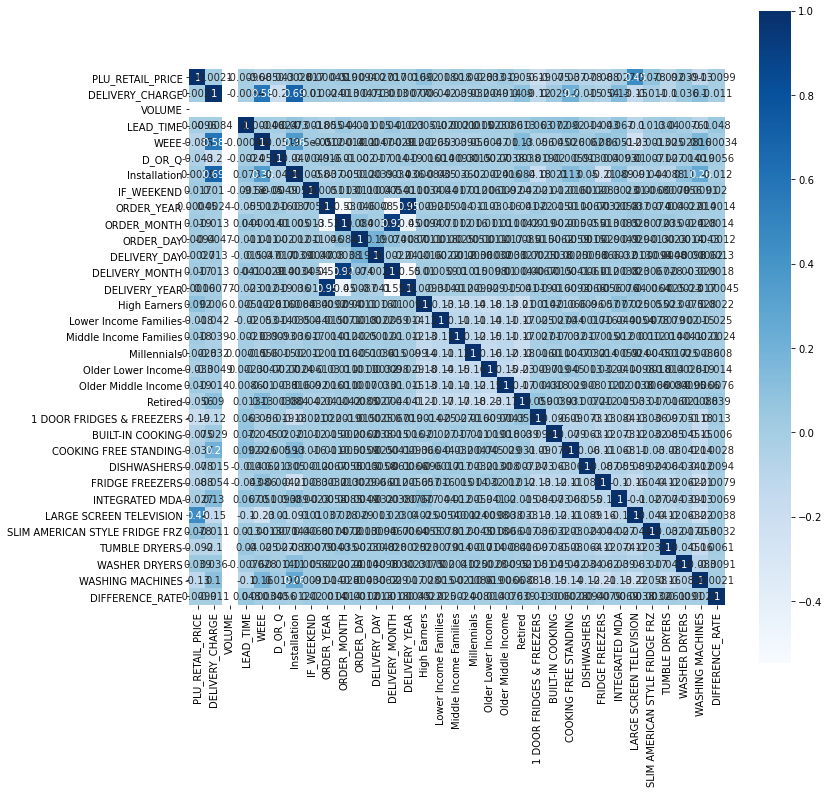

In [4]:
corr = data. corr()
import seaborn as sns
import matplotlib.pyplot as plt
dfData = corr
plt.subplots(figsize = (12,12))
sns.heatmap(dfData, annot= True, square = True, cmap = 'Blues')
plt.show()

In [5]:
data.columns

Index(['PLU_RETAIL_PRICE', 'DELIVERY_CHARGE', 'VOLUME', 'LEAD_TIME', 'WEEE',
       'AREA', 'D_OR_Q', 'Installation', 'IF_WEEKEND', 'ORDER_YEAR',
       'ORDER_MONTH', 'ORDER_DAY', 'DELIVERY_DAY', 'DELIVERY_MONTH',
       'DELIVERY_YEAR', 'High Earners', 'Lower Income Families',
       'Middle Income Families', 'Millennials', 'Older Lower Income',
       'Older Middle Income', 'Retired', '1 DOOR FRIDGES & FREEZERS',
       'BUILT-IN COOKING', 'COOKING FREE STANDING', 'DISHWASHERS',
       'FRIDGE FREEZERS', 'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES', 'DIFFERENCE_RATE'],
      dtype='object')

In [6]:
independent_variables = ['PLU_RETAIL_PRICE', 'LEAD_TIME',
       'IF_WEEKEND', 'WEEE', 'Installation', 'DIFFERENCE_RATE', 'High Earners', 'Lower Income Families',
       'Middle Income Families', 'Millennials', 'Older Lower Income',
       'Older Middle Income', 'Retired']
X = data[independent_variables]
y = data["D_OR_Q"] 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.3, random_state = 5)

In [9]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
#data = min_max_scaler.fit_transform(data[['PLU_RETAIL_PRICE','DELIVERY_CHARGE','LEAD_TIME','Rate']])

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [11]:
clf = RandomForestClassifier(n_estimators= 80,oob_score=True, random_state=10,max_features = 9)
print(clf)

RandomForestClassifier(max_features=9, n_estimators=80, oob_score=True,
                       random_state=10)


In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=9, n_estimators=80, oob_score=True,
                       random_state=10)

In [36]:
predictions = clf.predict(X_test)

## Scores

In [22]:
#The score for test set

clf.score(X_test,y_test)

0.8427455586135658

In [43]:
get_scores(y_test,predictions)

F1 Score: 0.9134217430172386
Accuracy: 0.8427455586135658
Precision: 0.8998342274307554
Recall: 0.9274258933338607


In [38]:
#Confusion Matrix. Here FalsePositive means flights which are cancelled and our model predict it correctly
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[ 14936, 104412],
       [ 73400, 937980]])

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

prob_y = clf.predict_proba(X_test)
prediction_validation = prob_y[:,1]
fprs, tprs, threshold = roc_curve(y_test, prediction_validation)
score = roc_auc_score(y_test, prediction_validation)

In [40]:
#This is the auc score

print(score)

0.5870203977055284


No handles with labels found to put in legend.


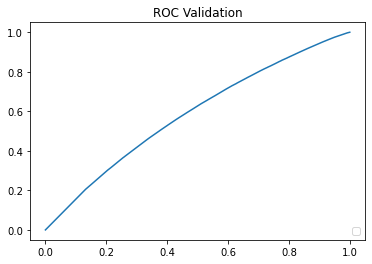

In [41]:
plt.title('ROC Validation')
plt.plot(fprs,tprs)
plt.legend(loc='lower right')
plt.show()
#This is the end of ExtraTreeClassifier with SMOTE with all variables

In [32]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
print(clf.feature_importances_)

[0.17633142 0.05967204 0.01733344 0.00910588 0.00660273 0.68231282
 0.00715875 0.00509055 0.00550507 0.00677623 0.00862752 0.007141
 0.00834255]


#independent_variables = ['PLU_RETAIL_PRICE', 'LEAD_TIME',
       'DELIVERY_WEEKDAY_WEEKEND', 'WEEE', 
       'Installation', 'Rate', 'High Earners', 'Lower Income Families',
       'Middle Income Families', 'Millennials', 'Older Lower Income',
       'Older Middle Income', 'Retired', '1 DOOR FRIDGES & FREEZERS',
       'BUILT-IN COOKING', 'COOKING FREE STANDING', 'DISHWASHERS',
       'FRIDGE FREEZERS', 'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES']

In [42]:
clf.oob_score_

0.9031369941838934

## Grid Research

In [9]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(50,100,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_features='sqrt',
                                              min_samples_leaf=20,
                                              min_samples_split=100,
                                              random_state=10),
             param_grid={'n_estimators': range(50, 100, 10)},
             scoring='roc_auc')

In [10]:
gsearch1.best_params_

{'n_estimators': 80}

In [11]:
gsearch1.best_score_

0.6777961036567317

In [12]:
param_test4 = {'max_features':range(3,11,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, max_depth=13, min_samples_split=120,
                                  min_samples_leaf=20 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, min_samples_leaf=20,
                                              min_samples_split=120,
                                              n_estimators=80, oob_score=True,
                                              random_state=10),
             iid=False, param_grid={'max_features': range(3, 11, 2)},
             scoring='roc_auc')

In [13]:
gsearch4.best_params_

{'max_features': 9}

In [14]:
gsearch4.best_score_

0.7524639689142057

In [ ]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, 
                                  min_samples_leaf=20,max_features=9 ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train,y_train)

In [ ]:
gsearch2.best_params_

In [ ]:
gsearch2.best_score_

In [ ]:
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80, max_depth=13,
                                  max_features=9 ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)

In [ ]:
gsearch3.best_params_

In [ ]:
gsearch3.best_score_